# **Frontier Technologies Learning Collaborative​**
## **Week 3: Classification**

### **Question: What kind of data more suitable for a classification task?**

**A)** Quantative Data

**B)** Continuous Data

**C)** Categorical Data

In [ ]:
# c categoricL Data


### **Question: Which of the visual represent the Sigmoid Function? (A, B, C)**

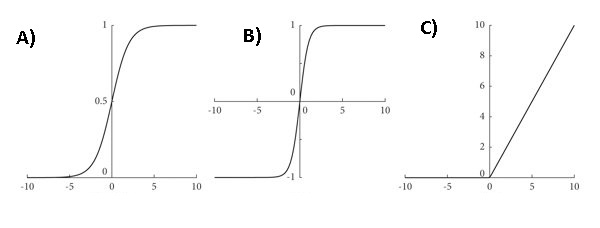

In [ ]:
# A is the visual representation of a sigmoid curve

### **Question: Please write sigmoid function that receives a value and returns the output after sigmoid function calculation**

**The sigmoid function:**

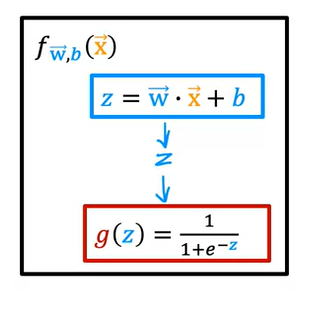

In [1]:
import numpy as np
def sigmoid(z):

  # formula
   

  return 1.0/(1.0 + np.exp(-z))

### **Question: Please visualize given sample dataset**

Expected output(please do not consider the colors or the theme of the sample visuals, main purpose is to visualize data points):



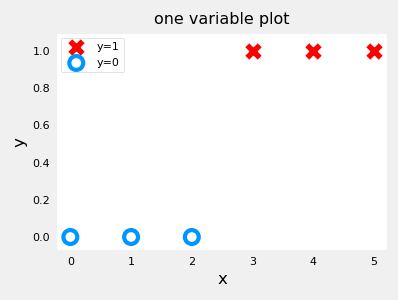

In [3]:
import numpy as np
import matplotlib.pyplot as plt

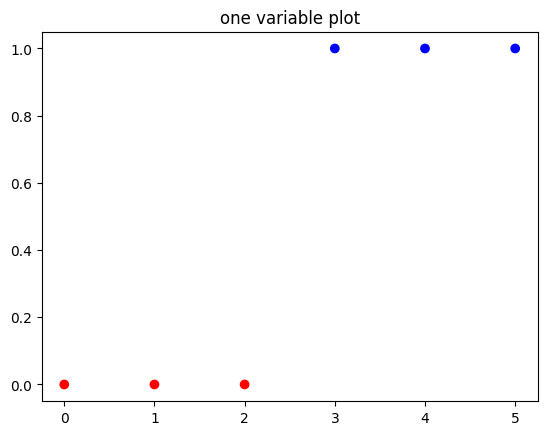

In [15]:
x_train = np.array([0., 1, 2, 3, 4, 5])
y_train = np.array([0,  0, 0, 1, 1, 1])
plt.title('one variable plot')

plt.scatter(x_train ,y_train,c=["red","red","red","blue","blue","blue"])

plt.show()


## **Classification Task: Finding smokers by body signals**

### **The dataset**

This dataset is a collection of basic health biological signal data.
The goal is to determine the presence or absence of smoking through bio-signals.

**Data shape: (55692, 27)**

*   **ID:** index
*   **gender**
*   **age:** 5-years gap
*   **height(cm)**
*   **weight(kg)**
*   **waist(cm):** Waist circumference length
*   **eyesight(left)**
*   **eyesight(right)**
*   **hearing(left)**
*   **hearing(right)**
*   **systolic:** Blood pressure
*   **relaxation:** Blood pressure
*   **fasting blood sugar**
*   **Cholesterol: **total
*   **triglyceride**
*   **HDL:** cholesterol type
*   **LDL:** cholesterol type
*   **hemoglobin**
*   **Urine protein**
*   **serum creatinine**
*   **AST:** glutamic oxaloacetic transaminase type
*   **ALT:** glutamic oxaloacetic transaminase type
*   **Gtp:** γ-GTP
*   **oral:** Oral Examination status
*   **dental caries**
*   **tartar:** tartar status
*   **smoking**

### **1. Import required packages**

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt


### **2. Import dataset**

In [3]:
def read_csv(file_path):
   
    
    smoking_data = pd.read_csv(file_path) 
    
    return smoking_data



filepath ="C:/Users/user/Desktop/Learning_Collaborative/data/smoking.csv"
smoking_data = read_csv(filepath)



### **3. Explore dataset**

*   Info
*   Shape
*   Do  visualization on features, (i.e. gender distribution on a pie chart, or histograms on other kind of features)
*   Identify valuable features for ML training (observe correlations between smokers and not smokers based on the features)
*   Preapre the dataset for ML model (converting categorical values to numerical variables - labelencoding)

In [4]:
smoking_data.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


In [5]:
smoking_data.describe()

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,...,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000
mean,27845.500000,44.182917,164.649321,65.864936,82.046418,1.012623,1.007443,1.025587,1.026144,121.494218,...,57.290347,114.964501,14.622592,1.087212,0.885738,26.182935,27.036037,39.952201,0.213334,0.367288
std,16077.039933,12.071418,9.194597,12.820306,9.274223,0.486873,0.485964,0.157902,0.159564,13.675989,...,14.738963,40.926476,1.564498,0.404882,0.221524,19.355460,30.947853,50.290539,0.409665,0.482070
min,0.000000,20.000000,130.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,71.000000,...,4.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,1.000000,0.000000,0.000000
25%,13922.750000,40.000000,160.000000,55.000000,76.000000,0.800000,0.800000,1.000000,1.000000,112.000000,...,47.000000,92.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,0.000000,0.000000
50%,27845.500000,40.000000,165.000000,65.000000,82.000000,1.000000,1.000000,1.000000,1.000000,120.000000,...,55.000000,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,25.000000,0.000000,0.000000
75%,41768.250000,55.000000,170.000000,75.000000,88.000000,1.200000,1.200000,1.000000,1.000000,130.000000,...,66.000000,136.000000,15.800000,1.000000,1.000000,28.000000,31.000000,43.000000,0.000000,1.000000
max,55691.000000,85.000000,190.000000,135.000000,129.000000,9.900000,9.900000,2.000000,2.000000,240.000000,...,618.000000,1860.000000,21.100000,6.000000,11.600000,1311.000000,2914.000000,999.000000,1.000000,1.000000


In [6]:
smoking_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   55692 non-null  int64  
 1   gender               55692 non-null  object 
 2   age                  55692 non-null  int64  
 3   height(cm)           55692 non-null  int64  
 4   weight(kg)           55692 non-null  int64  
 5   waist(cm)            55692 non-null  float64
 6   eyesight(left)       55692 non-null  float64
 7   eyesight(right)      55692 non-null  float64
 8   hearing(left)        55692 non-null  float64
 9   hearing(right)       55692 non-null  float64
 10  systolic             55692 non-null  float64
 11  relaxation           55692 non-null  float64
 12  fasting blood sugar  55692 non-null  float64
 13  Cholesterol          55692 non-null  float64
 14  triglyceride         55692 non-null  float64
 15  HDL                  55692 non-null 

KeyboardInterrupt: 

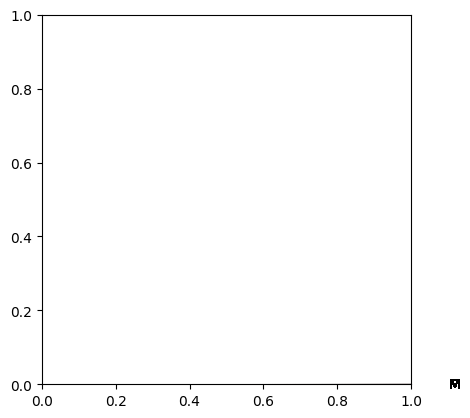

In [7]:
plt.pie(smoking_data['ID'] , labels= smoking_data['gender'])
plt.show()

In [8]:
smoking_data[smoking_data['smoking']==0]

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0
5,5,M,30,180,75,85.0,1.2,1.2,1.0,1.0,...,16.2,1.0,1.2,18.0,27.0,33.0,Y,0,Y,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55686,55673,F,60,150,50,75.0,1.0,1.2,1.0,1.0,...,12.6,1.0,0.8,26.0,21.0,14.0,Y,0,Y,0
55687,55676,F,40,170,65,75.0,0.9,0.9,1.0,1.0,...,12.3,1.0,0.6,14.0,7.0,10.0,Y,1,Y,0
55688,55681,F,45,160,50,70.0,1.2,1.2,1.0,1.0,...,14.0,1.0,0.9,20.0,12.0,14.0,Y,0,Y,0
55689,55683,F,55,160,50,68.5,1.0,1.2,1.0,1.0,...,12.4,1.0,0.5,17.0,11.0,12.0,Y,0,N,0


In [9]:
smoking_data = smoking_data[['gender','relaxation' , 'HDL' , 'LDL' ,'ALT', 'Gtp','hemoglobin','smoking']]
smoking_data

,gender,relaxation,HDL,LDL,ALT,Gtp,hemoglobin,smoking
0,F,73.0,73.0,126.0,19.0,27.0,12.9,0
1,F,70.0,42.0,127.0,19.0,18.0,12.7,0
2,M,86.0,55.0,151.0,16.0,22.0,15.8,1
3,M,60.0,45.0,226.0,26.0,18.0,14.7,0
4,F,74.0,62.0,107.0,14.0,22.0,12.5,0
...,...,...,...,...,...,...,...,...
55687,F,68.0,75.0,118.0,7.0,10.0,12.3,0
55688,F,62.0,73.0,79.0,12.0,14.0,14.0,0
55689,F,72.0,79.0,63.0,11.0,12.0,12.4,0
55690,M,76.0,48.0,146.0,19.0,18.0,14.4,0


In [10]:
smoking_data[smoking_data['smoking']==1]

,gender,relaxation,HDL,LDL,ALT,Gtp,hemoglobin,smoking
2,M,86.0,55.0,151.0,16.0,22.0,15.8,1
6,M,82.0,55.0,157.0,27.0,39.0,17.0,1
12,M,88.0,59.0,77.0,27.0,83.0,14.5,1
17,M,70.0,41.0,122.0,43.0,30.0,16.7,1
18,M,84.0,62.0,43.0,19.0,36.0,17.0,1
...,...,...,...,...,...,...,...,...
55673,M,83.0,56.0,77.0,43.0,110.0,14.4,1
55675,M,70.0,63.0,97.0,16.0,15.0,15.8,1
55679,M,82.0,67.0,192.0,18.0,29.0,15.5,1
55684,M,69.0,44.0,116.0,25.0,33.0,15.6,1


In [11]:
smoking_data["gender"] = smoking_data["gender"].astype('category')
smoking_data.dtypes
smoking_data["gender_cat"] = smoking_data["gender"].cat.codes
smoking_data.head()

,gender,relaxation,HDL,LDL,ALT,Gtp,hemoglobin,smoking,gender_cat
0,F,73.0,73.0,126.0,19.0,27.0,12.9,0,0
1,F,70.0,42.0,127.0,19.0,18.0,12.7,0,0
2,M,86.0,55.0,151.0,16.0,22.0,15.8,1,1
3,M,60.0,45.0,226.0,26.0,18.0,14.7,0,1
4,F,74.0,62.0,107.0,14.0,22.0,12.5,0,0


In [12]:
smoking_data.head()

,gender,relaxation,HDL,LDL,ALT,Gtp,hemoglobin,smoking,gender_cat
0,F,73.0,73.0,126.0,19.0,27.0,12.9,0,0
1,F,70.0,42.0,127.0,19.0,18.0,12.7,0,0
2,M,86.0,55.0,151.0,16.0,22.0,15.8,1,1
3,M,60.0,45.0,226.0,26.0,18.0,14.7,0,1
4,F,74.0,62.0,107.0,14.0,22.0,12.5,0,0


### **4. Build & Train Logistic Regression model (sklearn)**


*   Split the dataset into test and training sets (X_train, X_test, y_train, y_test)
*   Initiate the logistic regression model
*   Start training (you may also adjust parameters)




In [24]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score,f1_score,mean_squared_error
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns


In [14]:

random_seed = 123


X = smoking_data[['relaxation' , 'HDL' , 'LDL' ,'ALT', 'Gtp','hemoglobin','smoking','gender_cat']]
Y = smoking_data['smoking']
X_train, X_test, y_train, y_test = train_test_split(X,Y, random_state=123, train_size=0.8, shuffle=True)


In [15]:
print('Train Test percentages:', len(X_train)/len(X)*100, 100-len(X_train)/len(X)*100 )

Train Test percentages: 79.99892264598148 20.00107735401852


In [16]:
X_train.head()

,relaxation,HDL,LDL,ALT,Gtp,hemoglobin,smoking,gender_cat
50519,82.0,56.0,134.0,7.0,16.0,9.4,0,0
34664,80.0,50.0,121.0,15.0,23.0,16.6,1,1
27326,75.0,41.0,91.0,97.0,150.0,17.0,1,1
21614,68.0,54.0,130.0,15.0,21.0,15.6,0,1
21758,79.0,52.0,61.0,18.0,69.0,15.3,0,1


In [18]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
cost= mean_squared_error (y_test,y_pred)
acc = r2_score (y_test,y_pred)

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Mean squared error: %.5f' % cost)

print('Model Accuracy: %.2f' % acc)

Accuracy: 1.0
Mean squared error: 0.00000
Model Accuracy: 1.00


### **5. Evaluate the LR model with the test dataset**

- Classification report

In [21]:
from sklearn.metrics import classification_report

### **6. Visualize the classification results**